DataSet Link: https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

### **Pittsburgh Arrest**

#### **1. Why This**

* Purpose: Arrest data contains information on people taken into custody by City of Pittsburgh police officers. 

**Safety** is an important elements to decide **the Best Neighborhood**

#### **2. Metric**
* 2006-2023: Neighborhood crime 
* 2019-2023: Nieghborhood crime
* Lowest
* Uncompatible

#### **3. Analyst**

In [3]:
import pandas as pd

In [4]:
arrest=pd.read_csv("Arrest_Dataset.csv",index_col="_id")
arrest.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
_id,,,,,,,,,,,,,,,,
66620,2042463,21185048,53.0,M,B,2021-10-09T03:20:00,"1200 Block Liverpool ST Pittsburgh, PA 15233",9501 Bench Warrant,"1200 Block Liverpool ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.022787,40.455700
43135,2022225,19178503,55.0,F,B,2019-12-20T09:00:00,"6000 Block Woodlawn BL Aliquippa, PA 15001",9015 Failure To Appear/Arrest on Attachment Order,"2200 Block Woodward AV Pittsburgh, PA 15226",Brookline,6,1917.0,4.0,5.0,-80.021628,40.401339
42419,2021701,19243348,22.0,F,B,2019-11-29T18:38:00,"Watson ST & Gist ST Pittsburgh, PA 15219",4303 General Lighting Requirements. / 9501 Ben...,"Watson ST & Gist ST Pittsburgh, PA 15219",Bluff,2,103.0,6.0,3.0,-79.979479,40.437874
61445,2037860,21084445,29.0,M,B,2021-05-21T20:31:00,"300 Block S Main ST Pittsburgh, PA 15220",2701 Simple Assault. / 2706 Terroristic Threat...,"Frankstown AV & N Homewood AV Pittsburgh, PA 1...",Homewood North,5,1302.0,9.0,2.0,-79.896301,40.457405
59101,2035755,21038762,52.0,M,W,2021-03-07T17:30:00,"500 Block Brookline BL Pittsburgh, PA 15226",1543 Driving While Operating Privilege is Susp...,"500 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.023635,40.396221


In [5]:
#neighborhood_counts = arrest['INCIDENTNEIGHBORHOOD'].value_counts()

#print("Count of different values in INCIDENTNEIGHBORHOOD:")
#print(neighborhood_counts)
neighborhood_counts = arrest['INCIDENTNEIGHBORHOOD'].value_counts()

# Convert the Series to a DataFrame with two columns
neighborhood_counts = pd.DataFrame({'INCIDENTNEIGHBORHOOD': neighborhood_counts.index, 'Count': neighborhood_counts.values})

# Display the DataFrame
print(neighborhood_counts)


         INCIDENTNEIGHBORHOOD  Count
0   Central Business District   4439
1            South Side Flats   3496
2                     Carrick   2351
3              East Allegheny   2217
4              Homewood South   2090
..                        ...    ...
93              Regent Square     37
94          Central Northside     23
95            Mt. Oliver Boro     18
96     Troy Hill-Herrs Island      6
97    Mt. Oliver Neighborhood      2

[98 rows x 2 columns]


In [13]:
# Filter the dataframe for offenses including "Theft" or "Assault"
filtered_arrest = arrest[arrest['ARRESTTIME'].str.contains('2019|2020|2021|2022|2023', case=False)]

# Group by INCIDENTNEIGHBORHOOD and count the occurrences
neighborhood_counts2019 = filtered_arrest.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='COUNT')

neighborhood_counts2019 = neighborhood_counts2019.sort_values('COUNT', ascending=True)

# Display the table
print(neighborhood_counts2019)


         INCIDENTNEIGHBORHOOD  COUNT
54            Mt. Oliver Boro      8
69              Regent Square     19
55              New Homestead     24
26              East Carnegie     26
61             Outside County     26
..                        ...    ...
40             Homewood North   1262
25             East Allegheny   1266
15                    Carrick   1398
75           South Side Flats   1934
16  Central Business District   2900

[94 rows x 2 columns]


In [14]:
#crime low to zero after 2019
concatenated_df = pd.concat([neighborhood_counts['INCIDENTNEIGHBORHOOD'], neighborhood_counts2019['INCIDENTNEIGHBORHOOD']])


only_in_first = concatenated_df.drop_duplicates(keep=False)


print(only_in_first)

82    Golden Triangle/Civic Arena
94              Central Northside
96         Troy Hill-Herrs Island
97        Mt. Oliver Neighborhood
Name: INCIDENTNEIGHBORHOOD, dtype: object


<Figure size 1080x432 with 0 Axes>

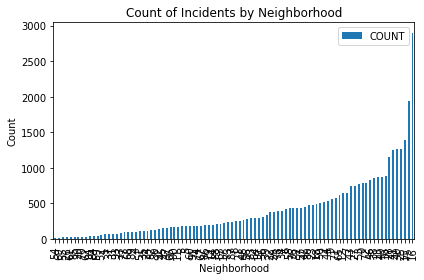

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
neighborhood_counts2019.plot(kind='bar')
plt.title('Count of Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

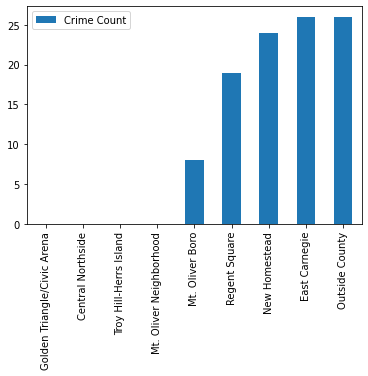

In [19]:
Crime_Count = [0,0,0,0,8,19,24,26,26]
index = ["Golden Triangle/Civic Arena","Central Northside","Troy Hill-Herrs Island","Mt. Oliver Neighborhood","Mt. Oliver Boro","Regent Square","New Homestead","East Carnegie","Outside County"]
df = pd.DataFrame({'Crime Count': Crime_Count}, index=index)
ax = df.plot.bar(rot=90)

#### **4. Word_Analyst**

* We can find from the table that Central Business District, Central Business District, South Side Flats, Carrick, East Allegheny, Homewood North still stay at the top even though we shrink the time scope. They are no doubt the most dangerous district.  
* 4 district crime rate low to 0:
    * Golden Triangle/Civic Arena
    * Central Northside
    * Troy Hill-Herrs Island
    * Mt. Oliver Neighborhood
*They are no doubt the best communities to live 
* However, It doesn't mean several others can't be the best. 
* Compare the smallest 5 crime rate:
* Though Regent Square (19), Mt. Oliver Boro (8) also have unignorable crime rate, records in this table are only from 2016-2023. It decreases much. 